In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

          Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        31          0         4   
1  12:15:00 AM    10         Tuesday        49          0         3   
2  12:30:00 AM    10         Tuesday        46          0         3   
3  12:45:00 AM    10         Tuesday        51          0         2   
4   1:00:00 AM    10         Tuesday        57          6        15   

   TruckCount  Total Traffic Situation  
0           4     39               low  
1           3     55               low  
2           6     55               low  
3           5     58               low  
4          16     94            normal  


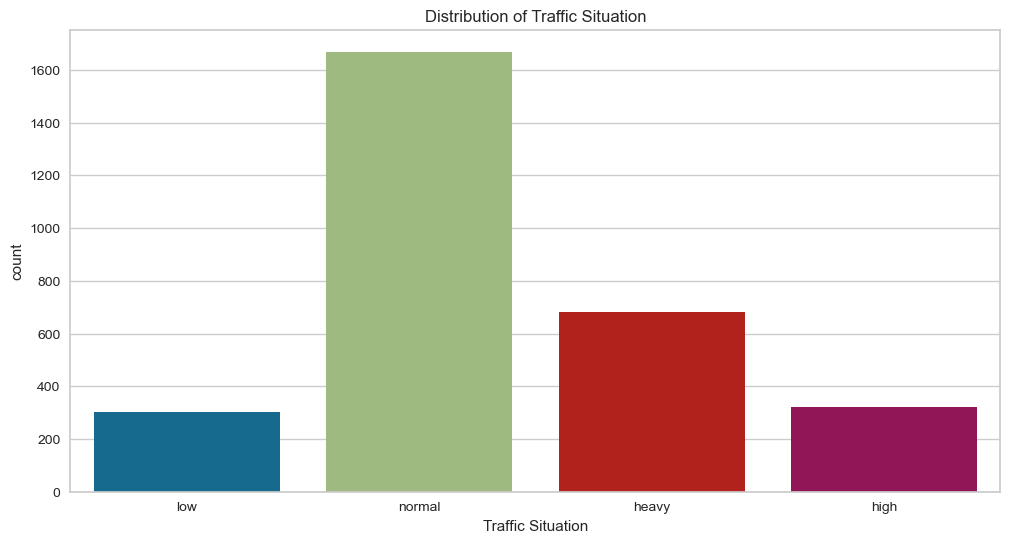

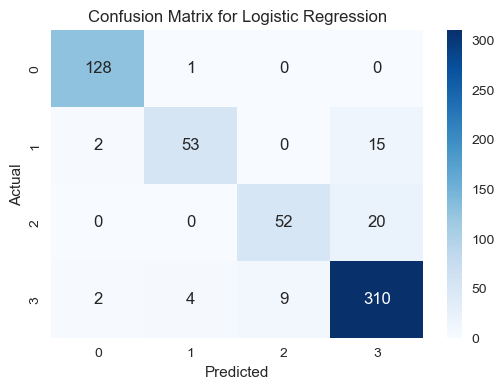

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       129
           1       0.91      0.76      0.83        70
           2       0.85      0.72      0.78        72
           3       0.90      0.95      0.93       325

    accuracy                           0.91       596
   macro avg       0.91      0.86      0.88       596
weighted avg       0.91      0.91      0.91       596



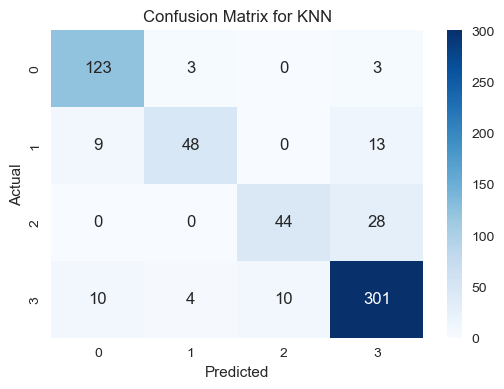

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       129
           1       0.87      0.69      0.77        70
           2       0.81      0.61      0.70        72
           3       0.87      0.93      0.90       325

    accuracy                           0.87       596
   macro avg       0.86      0.79      0.82       596
weighted avg       0.86      0.87      0.86       596

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


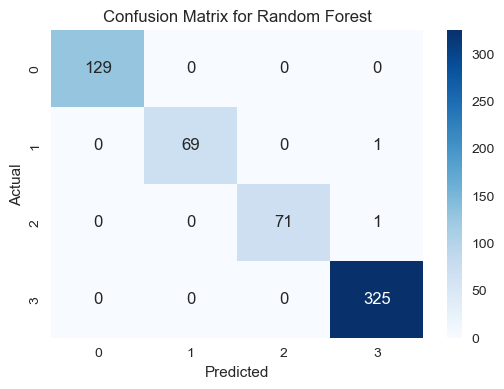

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      0.99      0.99        70
           2       1.00      0.99      0.99        72
           3       0.99      1.00      1.00       325

    accuracy                           1.00       596
   macro avg       1.00      0.99      1.00       596
weighted avg       1.00      1.00      1.00       596



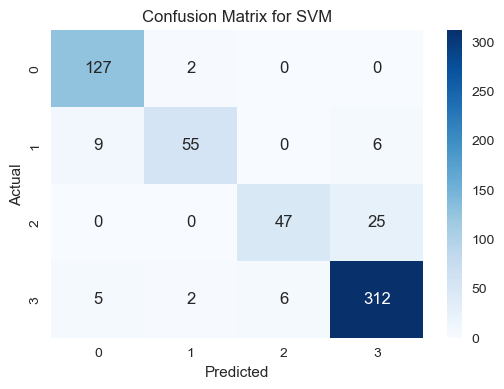

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       129
           1       0.93      0.79      0.85        70
           2       0.89      0.65      0.75        72
           3       0.91      0.96      0.93       325

    accuracy                           0.91       596
   macro avg       0.91      0.85      0.87       596
weighted avg       0.91      0.91      0.90       596

                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.911074   0.910172  0.911074  0.908632
1                  KNN  0.865772   0.864174  0.865772  0.861007
2        Random Forest  0.996644   0.996665  0.996644  0.996638
3                  SVM  0.907718   0.907587  0.907718  0.903997


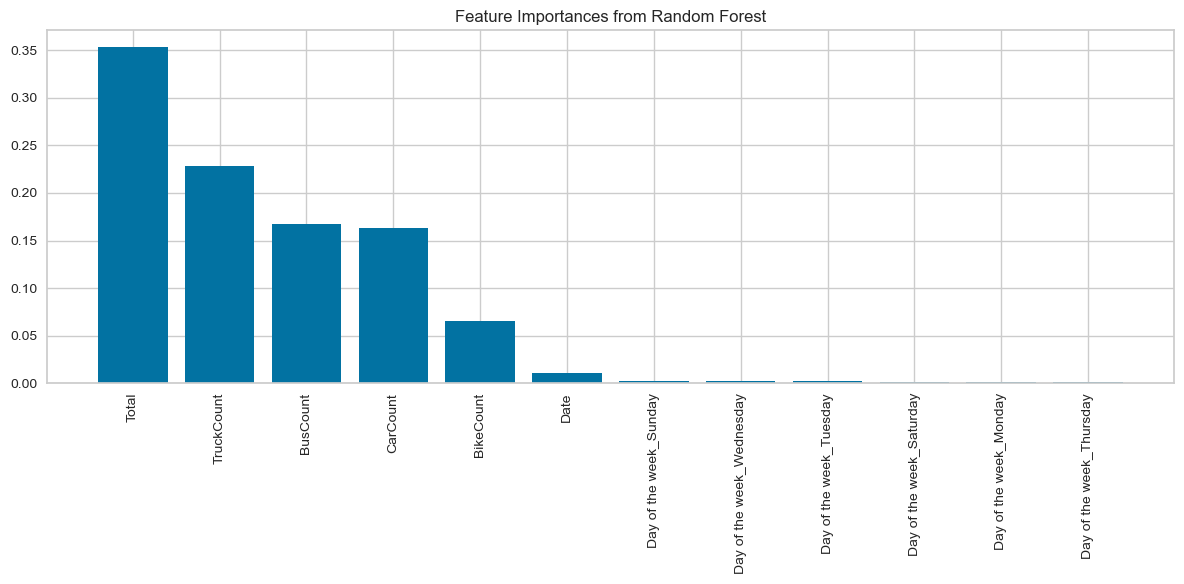

In [23]:

# Load the data
train_file = '../data/csv/Traffic.csv'
df = pd.read_csv(train_file)

# Display the first few rows
print(df.head())

# Exploratory Data Analysis
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Traffic Situation')
plt.title('Distribution of Traffic Situation')
plt.show()

# Prepare features and target variable
X = df.drop(['Time', 'Traffic Situation'], axis=1)
y = df['Traffic Situation']

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Encode target variable if it's categorical
le = LabelEncoder()
y = le.fit_transform(y)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, random_state=20, test_size=0.2)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Initialize a variable to store the Random Forest model
rf_model = None

# Iterate over models
for name, model in models.items():
    # Hyperparameter tuning (optional)
    if name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        }
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(x_train, y_train)
        model = grid_search.best_estimator_
        rf_model = model  # Store the Random Forest model
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        model.fit(x_train, y_train)
    
    # Predictions
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Classification report
    print(f'Classification Report for {name}:\n{classification_report(y_test, y_pred)}')

    # ROC Curve (for binary classification)
    if len(le.classes_) == 2 and y_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve for {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

# Feature Importance for Random Forest
if rf_model is not None:
    importances = rf_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns

    plt.figure(figsize=(12, 6))
    plt.title('Feature Importances from Random Forest')
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), [features[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("Random Forest model not found.")